<a href="https://colab.research.google.com/github/SoumyoNathTripathy/LGMVIP-DataScience/blob/main/Task_3_Music_Recommendation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author- SOUMYO NATH TRIPATHY

# **LETS GROW MORE**

Level- **Beginner**.

**Task 3- Music Recommendation:**

Dataset-   https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

(IMPORTING LIBRARIES)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np 
import seaborn as sns

(LOADING DATA)

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df       
         

In [ ]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
#test = reduce_mem_usage(pd.read_csv('test.csv'))
ext_song = reduce_mem_usage(pd.read_csv('song_extra_info.csv'))
members = (pd.read_csv('members.csv',parse_dates=['registration_init_time','expiration_date']))
songs = reduce_mem_usage(pd.read_csv('songs.csv'))

Memory usage of dataframe is 15.40 MB
Memory usage after optimization is: 6.90 MB
Decreased by 55.2%
Memory usage of dataframe is 13.60 MB
Memory usage after optimization is: 67.84 MB
Decreased by -398.8%
Memory usage of dataframe is 25.12 MB
Memory usage after optimization is: 44.73 MB
Decreased by -78.1%


(VISUALIZE DATA)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336330 entries, 0 to 336329
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   msno                336330 non-null  category
 1   song_id             336330 non-null  category
 2   source_system_tab   335415 non-null  category
 3   source_screen_name  321265 non-null  category
 4   source_type         335677 non-null  category
 5   target              336329 non-null  float16 
dtypes: category(5), float16(1)
memory usage: 6.9 MB


In [ ]:

songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470313 entries, 0 to 470312
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   song_id      470313 non-null  category
 1   song_length  470312 non-null  float32 
 2   genre_ids    457224 non-null  category
 3   artist_name  470312 non-null  category
 4   composer     262297 non-null  category
 5   lyricist     101107 non-null  category
 6   language     470312 non-null  float16 
dtypes: category(5), float16(1), float32(1)
memory usage: 44.7 MB


In [ ]:
ext_song.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:

ext_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594228 entries, 0 to 594227
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   song_id  594228 non-null  category
 1   name     594226 non-null  category
 2   isrc     535321 non-null  category
dtypes: category(3)
memory usage: 67.8 MB


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [ ]:

members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


(EDA)

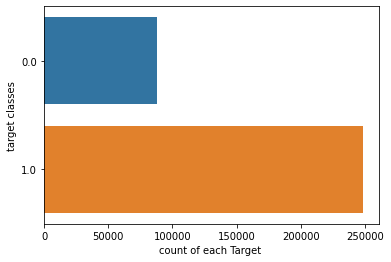

In [ ]:
sns.countplot(y=train['target'],data=train)
plt.ylabel('target classes')
plt.xlabel('count of each Target ')
plt.show()

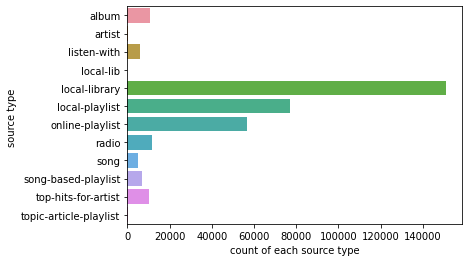

In [ ]:
 sns.countplot(y=train['source_type'],data=train)
plt.ylabel('source type ')
plt.xlabel('count of each source type')
plt.show()

In [ ]:
#mising values
def miss_val(df):
    for col in df.columns:
        nan_count=df[col].isnull().sum()
        total= df.shape[0]
        pp= (nan_count/ total )* 100
        #print(type(pp))
        print(col,'has' ,pp,'% missing values')

In [ ]:

print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.27205423245027205 % missing values
source_screen_name has 4.479231706954479 % missing values
source_type has 0.19415455059019415 % missing values
target has 0.00029732703000029734 % missing values


In [ ]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
gender has 57.84960613899951 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [ ]:
print('Song data')
miss_val(songs)

Song data
song_id has 0.0 % missing values
song_length has 0.00021262435867177817 % missing values
genre_ids has 2.7830402306549042 % missing values
artist_name has 0.00021262435867177817 % missing values
composer has 44.2292685934686 % missing values
lyricist has 78.50218896777253 % missing values
language has 0.00021262435867177817 % missing values


In [ ]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0003365711477749281 % missing values
isrc has 9.913198300988846 % missing values


(handling missing values)

In [ ]:
train['source_system_tab'].value_counts()

my library      234952
discover         63911
search           12945
radio            11598
listen with       6423
explore           5205
settings           227
notification       154
Name: source_system_tab, dtype: int64

In [ ]:
#replace with my library 
train['source_system_tab'].fillna('my library',inplace=True)

In [ ]:
train['source_type'].value_counts()

local-library             151193
local-playlist             77258
online-playlist            56912
radio                      11421
album                      10628
top-hits-for-artist        10185
song-based-playlist         6787
listen-with                 5835
song                        4782
artist                       400
topic-article-playlist       275
local-lib                      1
Name: source_type, dtype: int64

In [ ]:
#replace with local-library 
train['source_type'].fillna('local-library',inplace=True)

In [ ]:
train['source_screen_name'].value_counts()

Local playlist more     219053
Online playlist more     36435
Radio                    11274
Album more                8564
Discover Chart            7662
Discover Feature          7606
My library                6074
Artist more               5970
Search                    5803
Others profile more       5697
Explore                   2827
Discover Genre            2208
Unknown                    906
Search Home                354
Discover New               315
Search Trends              265
My library_Search          241
Self profile more           11
Name: source_screen_name, dtype: int64

In [ ]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.0 % missing values
source_screen_name has 4.479231706954479 % missing values
source_type has 0.0 % missing values
target has 0.00029732703000029734 % missing values


(MEMBER DATA)

In [ ]:
members.drop(['gender'], axis =1, inplace=True)

In [ ]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


(SONG DATA)

In [ ]:
songs.drop(['composer'], axis =1, inplace=True)
songs.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
songs['genre_ids'].value_counts()

465             153695
1609             31839
2022             31205
958              27661
2122             21044
                 ...  
1180|139             1
2022|242             1
465|437              1
1180|423             1
465|2122|109         1
Name: genre_ids, Length: 700, dtype: int64

In [ ]:
#replace with 465 
songs['genre_ids'].fillna('465',inplace=True)

In [ ]:
songs['language'].value_counts()

 52.0    233787
-1.0     109841
 3.0      53060
 17.0     31561
 31.0     15382
 24.0     14177
 10.0      8050
 45.0      2284
 59.0      1825
 38.0       345
Name: language, dtype: int64

In [ ]:
#replace with 465 
songs['language'].fillna(52.0,inplace=True)

In [ ]:
print('songs.info data')
miss_val(songs)

songs.info data
song_id has 0.0 % missing values
song_length has 0.00021262435867177817 % missing values
genre_ids has 0.0 % missing values
artist_name has 0.00021262435867177817 % missing values
language has 0.0 % missing values


(SONG_EXTRA_INFO DATA)

In [ ]:
ext_song['name'].value_counts()

Intro                                               403
Silent Night                                        266
Jingle Bells                                        242
White Christmas                                     238
Home                                                215
                                                   ... 
Take Me Back to Manhattan (From "Anything Goes")      1
Take Me Back to Toyland                               1
Take Me Back to Tulsa                                 1
Take Me Beyond                                        1
 'Che farò' from Orfeo ed Euridice (b)                1
Name: name, Length: 377418, dtype: int64

In [ ]:
#replace with Into 
ext_song['name'].fillna('Intro',inplace=True)

In [ ]:
ext_song['isrc'].value_counts()

GBPS81527413    43
GBPS81518943    38
GBPS81527823    38
GBPS81527820    37
GBPS81518952    37
                ..
TWAL31500705     1
TWAL31500706     1
TWAL31500707     1
TWAL31500708     1
AAA201604181     1
Name: isrc, Length: 474740, dtype: int64

In [ ]:
#replace with Into 
ext_song['isrc'].fillna('GBPS81518952',inplace=True)

In [ ]:

print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0 % missing values
isrc has 0.0 % missing values


(MERGING DATA)

In [ ]:
#meging data
songs_all= pd.merge(songs,ext_song,
                     on ='song_id' ,how='left')
train_memebrs= pd.merge(train,members,
                    on ='msno' ,how='left')
train_data= pd.merge(train_memebrs,songs_all,
                     on ='song_id' ,how='left')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336330 entries, 0 to 336329
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    336330 non-null  object        
 1   song_id                 336330 non-null  object        
 2   source_system_tab       336330 non-null  category      
 3   source_screen_name      321265 non-null  category      
 4   source_type             336330 non-null  category      
 5   target                  336329 non-null  float16       
 6   city                    336330 non-null  int64         
 7   bd                      336330 non-null  int64         
 8   registered_via          336330 non-null  int64         
 9   registration_init_time  336330 non-null  datetime64[ns]
 10  expiration_date         336330 non-null  datetime64[ns]
 11  song_length             238110 non-null  float32       
 12  genre_ids               238110

In [ ]:
train_data.drop(['msno'], axis =1, inplace=True)
train_data.drop(['song_id'], axis =1, inplace=True)
train_data.drop(['isrc'], axis =1, inplace=True)
train_data.drop(['artist_name'], axis =1, inplace=True)
train_data.drop(['genre_ids'], axis =1, inplace=True)
train_data.drop(['name'], axis =1, inplace=True)

In [ ]:
train_data['membership_days'] = train_data['expiration_date'].subtract(train_data['registration_init_time']).dt.days.astype(int)
train_data['registration_year'] = train_data['registration_init_time'].dt.year
train_data['expiration_year'] = train_data['expiration_date'].dt.year
train_data.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)
train_data.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
0,explore,Explore,online-playlist,1.0,1,0,7,NaN,NaN,2103,2012,2017
1,my library,Local playlist more,local-playlist,1.0,13,24,9,NaN,NaN,2301,2011,2017
2,my library,Local playlist more,local-playlist,1.0,13,24,9,225396.0,52.0,2301,2011,2017
3,my library,Local playlist more,local-playlist,1.0,13,24,9,NaN,NaN,2301,2011,2017
4,explore,Explore,online-playlist,1.0,1,0,7,NaN,NaN,2103,2012,2017


In [ ]:
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(train_data[f].values) )
    train_data[f] = lb.transform(list(train_data[f].values))

In [ ]:
for col in train_data.columns:
    if train_data[col].dtype == object:
        train_data[col] = train_data[col].astype('category')

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.00029732703000029734 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 29.203460886629202 % missing values
language has 29.203460886629202 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [ ]:
train_data['song_length'].value_counts()

219324.0    1368
227343.0    1292
290063.0    1096
258298.0     982
283846.0     946
            ... 
370172.0       1
151812.0       1
370207.0       1
185132.0       1
276596.0       1
Name: song_length, Length: 15109, dtype: int64

In [ ]:
#replace with Into 
train_data['song_length'].fillna(235415.0 ,inplace=True)

In [ ]:

train_data['language'].value_counts()

 3.0     135442
 52.0     57864
 31.0     22604
-1.0       8214
 17.0      5883
 10.0      5491
 24.0      2462
 59.0       104
 45.0        44
 38.0         2
Name: language, dtype: int64

In [ ]:
train_data['language'].fillna(3.0 ,inplace=True)

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.00029732703000029734 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [ ]:
train_data.replace([np.inf,-np.inf],np.nan, inplace =True)

In [ ]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.00029732703000029734 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


(MODEL BUILDING)

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
train_data.shape

(336330, 12)

In [ ]:
train_data = train_data.sample(frac = 1)

In [ ]:
train_data1=train_data[0:30000]

In [ ]:
train_data1.shape

(30000, 12)

In [ ]:

train_data1.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
161979,3,7,5,1.0,5,47,4,235415.0,3.0,570,2016,2017
109672,3,7,4,1.0,13,0,9,235415.0,3.0,825,2015,2018
183036,3,7,4,0.0,13,25,9,286928.0,3.0,2686,2010,2017
114901,3,7,4,1.0,1,0,7,235415.0,3.0,364,2016,2017
10151,3,7,5,1.0,4,20,3,222197.0,52.0,1530,2013,2017


In [ ]:
x = train_data1.drop(['target'], axis =1)
y = train_data1['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 321540 to 191575
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source_system_tab   21000 non-null  int64  
 1   source_screen_name  21000 non-null  int64  
 2   source_type         21000 non-null  int64  
 3   city                21000 non-null  int64  
 4   bd                  21000 non-null  int64  
 5   registered_via      21000 non-null  int64  
 6   song_length         21000 non-null  float32
 7   language            21000 non-null  float16
 8   membership_days     21000 non-null  int64  
 9   registration_year   21000 non-null  int64  
 10  expiration_year     21000 non-null  int64  
dtypes: float16(1), float32(1), int64(9)
memory usage: 1.7 MB


In [ ]:

x_train.describe()

,source_system_tab,source_screen_name,source_type,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.00000,21000.000000,21000.000000,21000.000000
mean,2.572714,7.677048,4.845238,7.670000,17.401619,6.801952,2.430095e+05,inf,1655.999429,2012.665619,2017.064857
std,1.451847,3.314691,1.731144,6.614468,20.215637,2.288715,4.461648e+04,18.90625,1121.507982,3.007997,0.366697
min,0.000000,0.000000,0.000000,1.000000,-43.000000,3.000000,1.084000e+04,-1.00000,0.000000,2004.000000,2012.000000
25%,3.000000,7.000000,4.000000,1.000000,0.000000,4.000000,2.273780e+05,3.00000,730.000000,2011.000000,2017.000000
50%,3.000000,7.000000,4.000000,5.000000,21.000000,7.000000,2.354150e+05,3.00000,1442.500000,2013.000000,2017.000000
75%,3.000000,7.000000,6.000000,13.000000,28.000000,9.000000,2.602840e+05,17.00000,2290.000000,2015.000000,2017.000000
max,7.000000,18.000000,11.000000,22.000000,1030.000000,13.000000,2.216960e+06,59.00000,5141.000000,2016.000000,2019.000000


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
np.isnan(x_test.any())

False

In [ ]:
clf = SVC(kernel='linear', C=1.0, random_state=0)

clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pp=clf.predict(x_test)
print ("Test - Accuracy :", accuracy_score(y_test, y_pp))
print ("Test -  Confusion matrix :\n",confusion_matrix(y_test, y_pp))

Test - Accuracy : 0.7406666666666667
Test -  Confusion matrix :
 [[   0 2334]
 [   0 6666]]
